In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data_ad_english.csv")

In [3]:
data['Date'] = pd.to_datetime(data['Date'])

In [4]:
data_april = data[(data['Date'].dt.month == 4)]

In [5]:
selected_materials = data_april['Material_Name'].unique()[:5]
data_selected = data_april[data_april['Material_Name'].isin(selected_materials)].copy()

In [6]:
data_selected.loc[:, 'Ad_Clicks_Rate'] = data_selected['Ad_Clicks'] / data_selected['Ad_Impressions']
data_selected.loc[:, 'User_Conversions_Rate'] = data_selected['User_Conversions'] / data_selected['Ad_Clicks']

In [7]:
sns.set(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

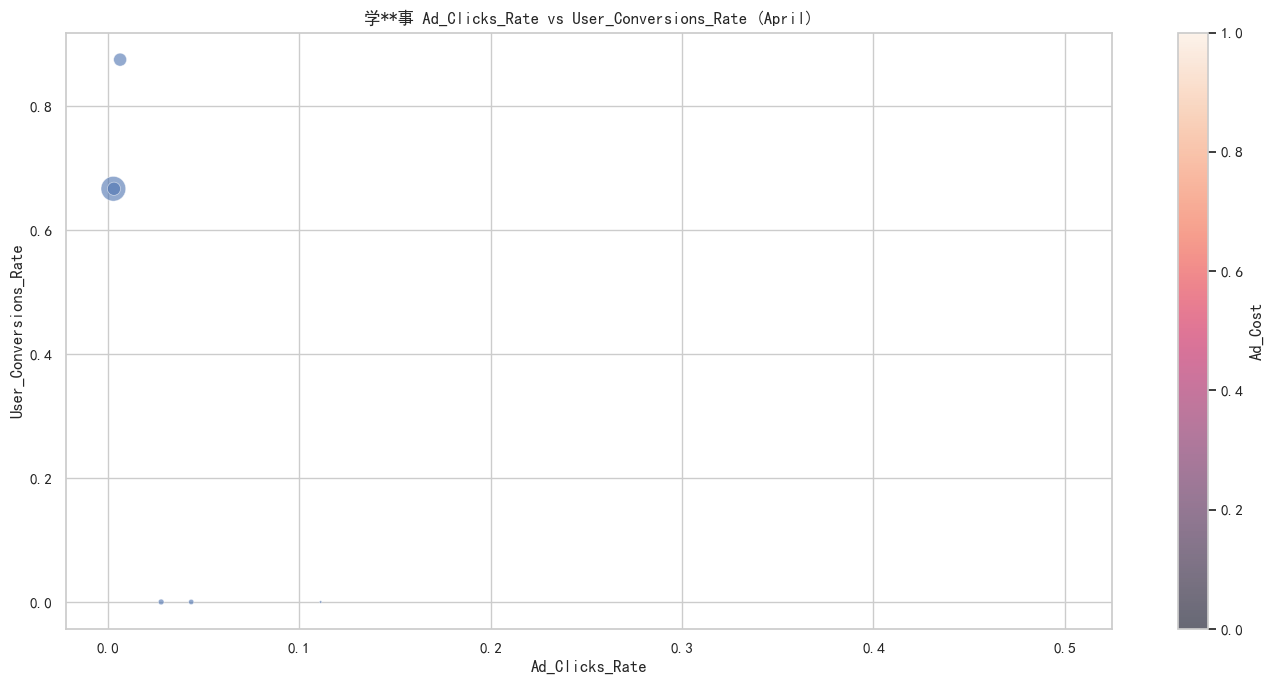

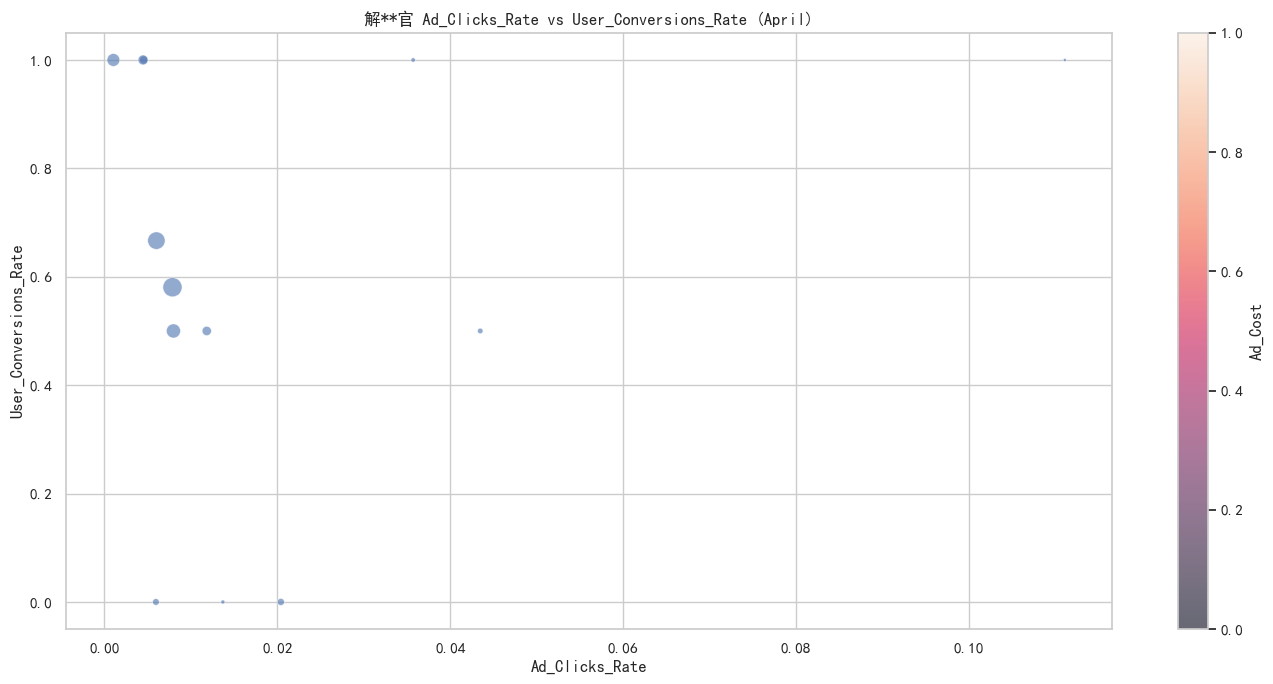

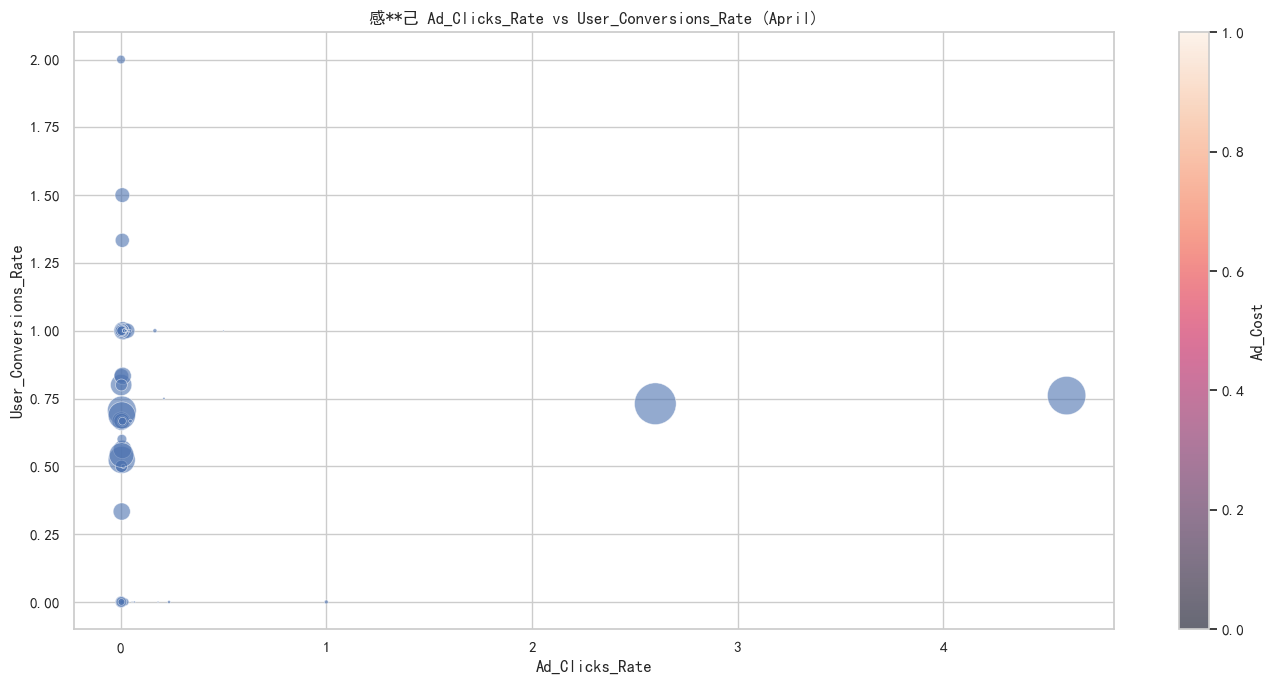

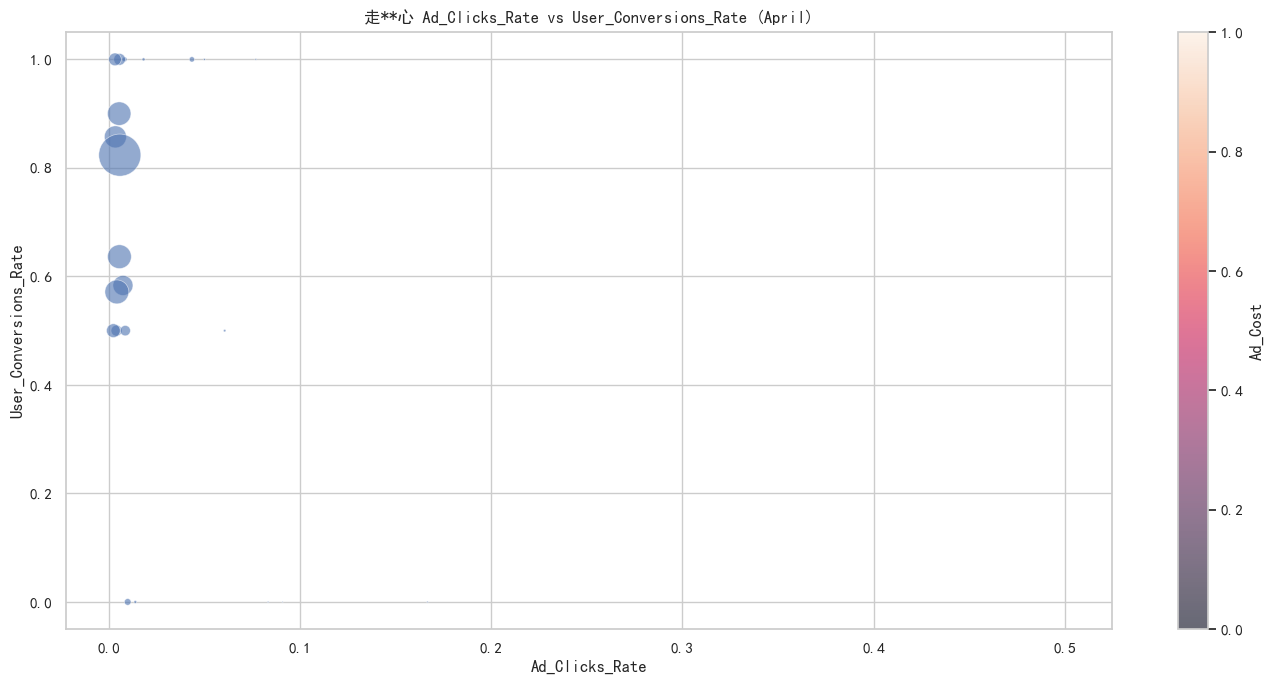

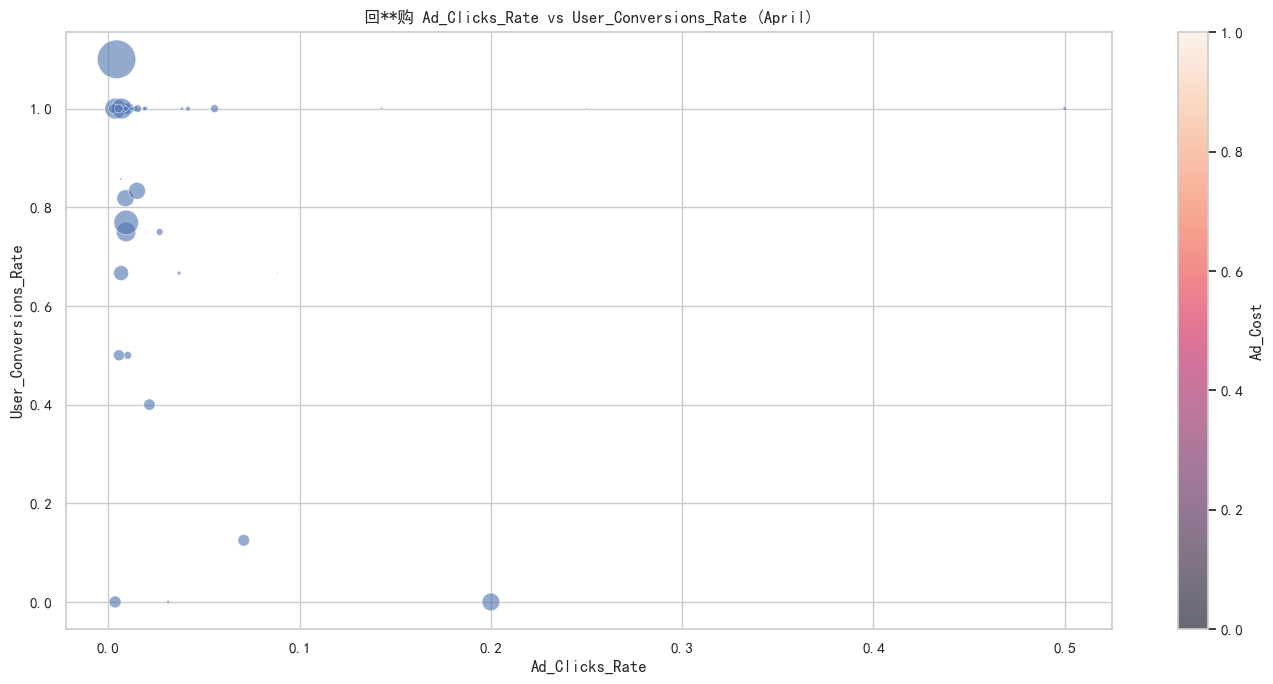

In [8]:
for material in selected_materials:
    data_material = data_selected[data_selected['Material_Name'] == material]
    plt.figure(figsize=(14, 7))
    scatter = plt.scatter(
        data_material['Ad_Clicks_Rate'],
        data_material['User_Conversions_Rate'],
        s=data_material['Ad_Cost'] / 0.5,  # 调整点的大小，减小除数以增大点的大小
        alpha=0.6,
        edgecolors='w',
        linewidth=0.5
    )
    cbar = plt.colorbar(scatter)
    cbar.set_label('Ad_Cost')
    plt.title(f'{material} Ad_Clicks_Rate vs User_Conversions_Rate (April)')
    plt.xlabel('Ad_Clicks_Rate')
    plt.ylabel('User_Conversions_Rate')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [10]:
!pip install scipy

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 647.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/44.5 MB 3.2 MB/s eta 0:00:14
   ---------------------------------------- 0.1/44.5 MB 1.2 MB/s eta 0:00:38
   ---------------------------------------- 0.4/44.5 MB 2.9 MB/s eta 0:00:16
    --------------------------------------- 1.0/44.5 MB 6.3 MB/s eta 0:00:07
   -- ------------------------------------- 2.3/44.5 MB 10.4 MB/s eta 0:00:05
   ---- ----------------------------------- 4.5/44.5 MB 16.7 MB/s eta 0:00:03
   ------ --------------------------------- 7.5/44.5 MB 24.1 MB/s eta 0:00:02
   --------- ------------------------------ 10.4/44.5 MB 38.5 MB/s eta 0:00:01
   ------------ --------------------------- 13.4/44.5 MB 65.2 MB/s eta 0:00:0


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind, levene

In [13]:
data_april = data[(data['Date'].dt.month == 4)]

In [14]:
plan_group_J = '目标_J'
plan_group_X = '目标_X'

In [16]:
data_J = data_april[data_april['Plan_Group'] == plan_group_J]
data_X = data_april[data_april['Plan_Group'] == plan_group_X]

In [17]:
sum_J = data_J['Ad_Cost'].sum()
mean_J = data_J['Ad_Cost'].mean()
sum_X = data_X['Ad_Cost'].sum()
mean_X = data_X['Ad_Cost'].mean()

In [18]:
print(f'{plan_group_J} - 消耗 Sum: {sum_J}, Mean: {mean_J}')
print(f'{plan_group_X} - 消耗 Sum: {sum_X}, Mean: {mean_X}')

目标_J - 消耗 Sum: 49570.95999999999, Mean: 14.953532428355956
目标_X - 消耗 Sum: 34934.48, Mean: 12.589001801801803


In [19]:
t_stat, p_value = ttest_ind(data_J['Ad_Cost'], data_X['Ad_Cost'])
levene_stat, levene_p = levene(data_J['Ad_Cost'], data_X['Ad_Cost'])

In [20]:
print(f'T检验结果 - t-statistic: {t_stat}, p-value: {p_value}')
print(f'方差齐性检验结果 - statistic: {levene_stat}, p-value: {levene_p}')

T检验结果 - t-statistic: 1.9983864301798073, p-value: 0.0457191772351117
方差齐性检验结果 - statistic: 4.108299515718191, p-value: 0.042716744128040676


In [21]:
correlation_matrix = data_april[['Ad_Cost', 'Ad_Impressions', 'Ad_Clicks', 'User_Conversions', 'Orders_Placed', 'Order_Amount_Placed', 'Orders_Completed', 'Order_Amount_Completed', 'Store_Favorites', 'Product_Favorites', 'Add_To_Cart', 'ROI']].corr()

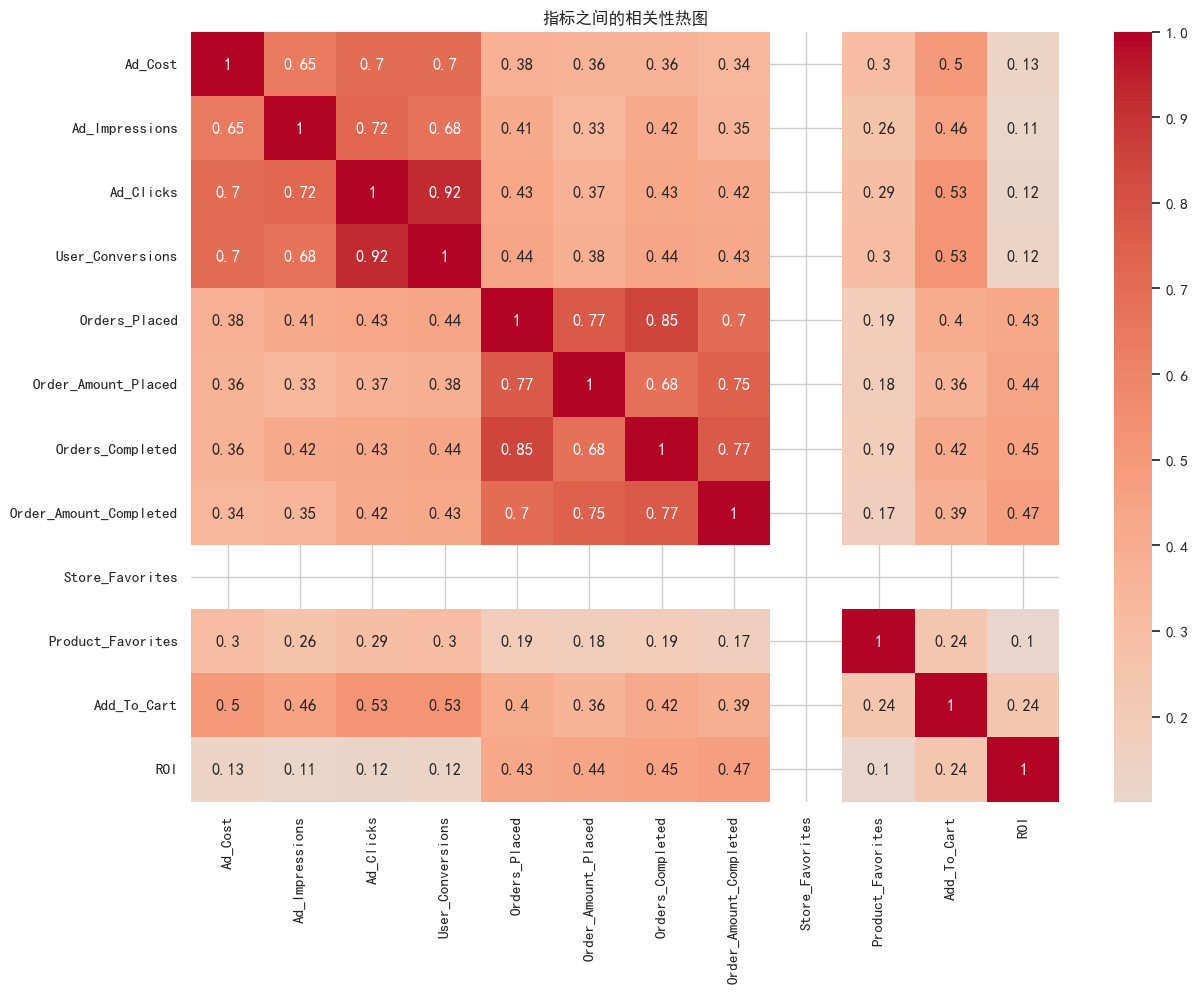

In [22]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('指标之间的相关性热图')
plt.show() 